## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])

# Modify header
merged_data_df = merged_data_df.rename(columns={'Age_months': 'Age (months)'})

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
total_mice = len(merged_data_df['Mouse ID'].unique())
total_mice

249

In [4]:
# Find the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Locate all the duplicated mice and return Mouse ID
duplicated_mice_ID = merged_data_df.loc[duplicated_mice, 'Mouse ID'].unique()

In [5]:
# Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_data = merged_data_df.loc[merged_data_df['Mouse ID'] == duplicated_mice_ID[0]]
duplicated_mice_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
analysis_data_df = merged_data_df.drop(duplicated_mice_ID_data.index)

# Store analysis starting data file
analysis_data_df.to_csv('data/analysis_data.csv', index=False, header=True)

In [7]:
# Checking the number of mice in the clean DataFrame.
no_mice_analysis = len(analysis_data_df['Mouse ID'].unique())
no_mice_analysis

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of the tumor volume for each regimen
drug_regimen_gp = analysis_data_df.groupby('Drug Regimen')

# Mean
mean = drug_regimen_gp['Tumor Volume (mm3)'].mean()

# Median
median = drug_regimen_gp['Tumor Volume (mm3)'].median()

# Variance 
var = drug_regimen_gp['Tumor Volume (mm3)'].var()

# Standard deviation
std = drug_regimen_gp['Tumor Volume (mm3)'].std()

# SEM: return unbiased stardard error of mean 
sem = drug_regimen_gp['Tumor Volume (mm3)'].sem()

# Combine all statistics computation together
summary_statistics_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': var,
    'Standard deviation': std,
    'SEM': sem
})

# Present Summary Statistics
summary_statistics_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Calculate number of mice per Drug Regimen using for both bar charts in different methods 
no_mice_per_regimen = drug_regimen_gp['Mouse ID'].count().sort_values(ascending=False)

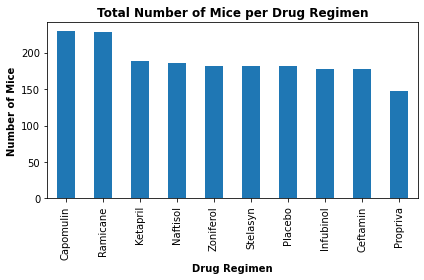

In [10]:
# **Using pandas** Generate a bar plot showing the total number of mice for each treatment 
pd_bar_mice_per_regimen = no_mice_per_regimen.plot(kind='bar', width=0.5)

# Set x/y label, title and show the bar graph
pd_bar_mice_per_regimen.set_title(label='Total Number of Mice per Drug Regimen', fontweight = 'bold')
pd_bar_mice_per_regimen.set_xlabel('Drug Regimen', fontweight = 'bold')
pd_bar_mice_per_regimen.set_ylabel('Number of Mice', fontweight = 'bold')
plt.tight_layout()

# Save bar graph to Images folder
pd_bar_mice_per_regimen.figure.savefig('Images/pd_bar_mice_per_regimen.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()

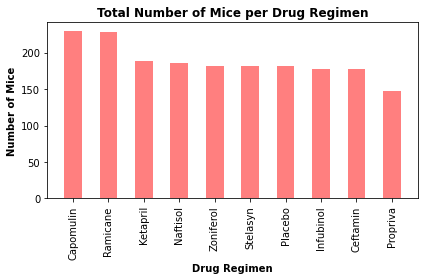

In [11]:
# **Using pyplot** Generate a bar plot showing the total number of mice for each treatment 
# Set x axis
x_axis_regimen = np.arange(len(no_mice_per_regimen))
regimen_name = list(no_mice_per_regimen.index.values)
 
# Create bar chart
py_bar_mice_per_regimen = plt.bar(x_axis_regimen, no_mice_per_regimen, color='red', alpha=0.5, width=0.5)

# Set x/y label, title and show the bar graph
plt.xticks(x_axis_regimen, regimen_name, rotation='vertical')
plt.title('Total Number of Mice per Drug Regimen', fontweight = 'bold')
plt.xlabel('Drug Regimen', fontweight = 'bold')
plt.ylabel('Number of Mice', fontweight = 'bold')
plt.tight_layout()

# Save bar graph to Images folder
plt.savefig('Images/py_bar_mice_per_regimen.png', format='png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()

In [12]:
# The distribution of female versus male mice
sex_mice = analysis_data_df.groupby('Sex')['Sex'].count()

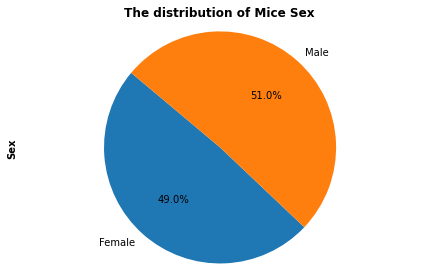

In [13]:
# **Using pandas** Generate a pie plot showing the distribution of female versus male mice
pd_pie_mice_sex = sex_mice.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set x/y label, title and show the bar graph
pd_pie_mice_sex.set_title(label='The distribution of Mice Sex', fontweight = 'bold')
pd_pie_mice_sex.set_ylabel('Sex', fontweight = 'bold')
plt.tight_layout()

# Save bar graph to Images folder
pd_pie_mice_sex.figure.savefig('Images/pd_pie_mice_sex.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()

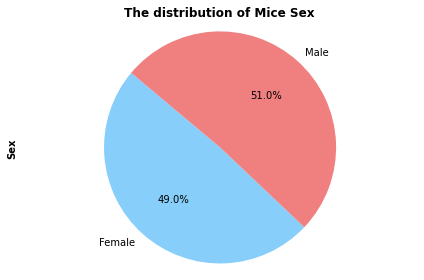

In [14]:
# **Using pyplot** Generate a pie plot showing the distribution of female versus male mice
# Set x_axis and colors
sex = sex_mice.index
colors = ['lightskyblue','lightcoral']

# Create pie chart
py_bar_mice_sex = plt.pie(sex_mice, labels=sex_mice.index, autopct="%1.1f%%", colors=colors, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set x/y label, title and show the bar graph
plt.title('The distribution of Mice Sex', fontweight = 'bold')
plt.ylabel('Sex', fontweight = 'bold')
plt.tight_layout()

# Save an image of pie chart
plt.savefig('Images/py_pie_mice_sex.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()

## Quartiles, Outliers and Boxplots

In [92]:
# Focus only on four regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Calculate the final tumor volume of each mouse
final_tumor_vol = analysis_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()

In [177]:
# Capomulin
Capomulin_final_tumor_df = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Capomulin']
Capomulin_tumor = Capomulin_final_tumor_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers.
cap_quartiles = Capomulin_tumor.quantile([0.25,0.5,0.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq    
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

# Determine outliers using upper and lower bounds
cap_outliers_df = Capomulin_final_tumor_df.loc[(Capomulin_final_tumor_df['Tumor Volume (mm3)'] < cap_lower_bound)
                                              | (Capomulin_final_tumor_df['Tumor Volume (mm3)'] > cap_upper_bound)]

print(f"Final tumor volume(mm3) for Capomulin below {cap_lower_bound} could be outliers.")
print(f"Final tumor volume(mm3) for Capomulin above {cap_upper_bound} could be outliers.")
print(f"Number of outliers for Capomulin is: {cap_outliers_df['Tumor Volume (mm3)'].count()}")
if cap_outliers_df['Tumor Volume (mm3)'].count() > 0:
    print(cap_outliers_df)


Final tumor volume(mm3) for Capomulin below 20.70456164999999 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83201549 could be outliers.
Number of outliers for Capomulin is: 0


In [187]:
# Ceftamin
Ceftamin_final_tumor_df = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Ceftamin']
Ceftamin_tumor = Ceftamin_final_tumor_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers.
cef_quartiles = Ceftamin_tumor.quantile([0.25,0.5,0.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-inf_lowerq    
cef_lower_bound = cef_lowerq - (1.5*ram_iqr)
cef_upper_bound = cef_upperq + (1.5*ram_iqr)

# Determine outliers using upper and lower bounds
cef_outliers_df = Ceftamin_final_tumor_df.loc[(Ceftamin_final_tumor_df['Tumor Volume (mm3)'] < cef_lower_bound)
                                              | (Ceftamin_final_tumor_df['Tumor Volume (mm3)'] > cef_upper_bound)]

print(f"Final tumor volume(mm3) for Ceftamin below {cef_lower_bound} could be outliers.")
print(f"Final tumor volume(mm3) for Ceftamin above {cef_upper_bound} could be outliers.")
print(f"Number of outliers for Ceftamin is: {cef_outliers_df['Tumor Volume (mm3)'].count()}")
if cef_outliers_df['Tumor Volume (mm3)'].count() > 0:
    print(cef_outliers_df)

Final tumor volume(mm3) for Ceftamin below 35.07427277 could be outliers.
Final tumor volume(mm3) for Ceftamin above 77.94763511 could be outliers.
Number of outliers for Ceftamin is: 0


In [188]:
# Infubinol
Infubinol_final_tumor_df = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Infubinol']
Infubinol_tumor = Infubinol_final_tumor_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers.
inf_quartiles = Infubinol_tumor.quantile([0.25,0.5,0.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq    
inf_lower_bound = inf_lowerq - (1.5*ram_iqr)
inf_upper_bound = inf_upperq + (1.5*ram_iqr)

# Determine outliers using upper and lower bounds
inf_outliers_df = Infubinol_final_tumor_df.loc[(Infubinol_final_tumor_df['Tumor Volume (mm3)'] < inf_lower_bound)
                                              | (Infubinol_final_tumor_df['Tumor Volume (mm3)'] > inf_upper_bound)]

print(f"Final tumor volume(mm3) for Infubinol below {inf_lower_bound} could be outliers.")
print(f"Final tumor volume(mm3) for Infubinol above {inf_upper_bound} could be outliers.")
print(f"Number of outliers for Infubinol is: {inf_outliers_df['Tumor Volume (mm3)'].count()}")
if inf_outliers_df['Tumor Volume (mm3)'].count() > 0:
    print(inf_outliers_df)

Final tumor volume(mm3) for Infubinol below 40.40080261 could be outliers.
Final tumor volume(mm3) for Infubinol above 79.17354793 could be outliers.
Number of outliers for Infubinol is: 1
   Drug Regimen Mouse ID  Timepoint  Tumor Volume (mm3)
55    Infubinol     c326          5           36.321346


In [196]:
# Ramicane
Ramicane_final_tumor_df = final_tumor_df[final_tumor_df['Drug Regimen'] == 'Ramicane']
Ramicane_tumor = Ramicane_final_tumor_df['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers.
ram_quartiles = Ramicane_tumor.quantile([0.25,0.5,0.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq    
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

# Determine outliers using upper and lower bounds
ram_outliers_df = Ramicane_final_tumor_df.loc[(Ramicane_final_tumor_df['Tumor Volume (mm3)'] < ram_lower_bound)
                                              | (Ramicane_final_tumor_df['Tumor Volume (mm3)'] > ram_upper_bound)]

print(f"Final tumor volume(mm3) for Ceftamin below {ram_lower_bound} could be outliers.")
print(f"Final tumor volume(mm3) for Ceftamin above {ram_upper_bound} could be outliers.")
print(f"Number of outliers for Capomulin is: {ram_outliers_df['Tumor Volume (mm3)'].count()}")
if ram_outliers_df['Tumor Volume (mm3)'].count() > 0:
    print(inf_outliers_df)

Final tumor volume(mm3) for Ceftamin below 17.912664470000003 could be outliers.
Final tumor volume(mm3) for Ceftamin above 54.30681135 could be outliers.
Number of outliers for Capomulin is: 0


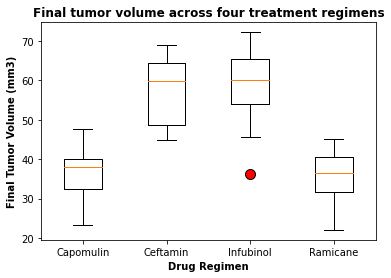

In [97]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
regimen = list(four_regimen_final_tumor_df['Drug Regimen'].unique())
final_tumor_vol = [Capomulin_tumor, Ceftamin_tumor, Infubinol_tumor, Ramicane_tumor]
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.set_title('Final tumor volume across four treatment regimens', fontweight='bold')
final_tumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')
final_tumor_plot.boxplot(final_tumor_vol, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})

# Save box plot graph to Images folder
final_tumor_plot.figure.savefig('Images/final_tumor_plot.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

## Line and Scatter Plots

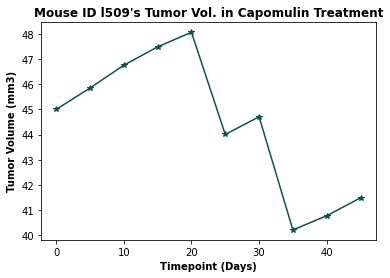

In [106]:
# Generate dataframe only in Capomulin Regimen
Capomulin_df = analysis_data_df.loc[analysis_data_df['Drug Regimen'] == 'Capomulin']

# Identify specific mouse ID and get data of the mouse id
mouse_id = 'l509'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='*', color='#0B5345')
plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
final_tumor_plot.figure.savefig('Images/final_tumor_plot.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

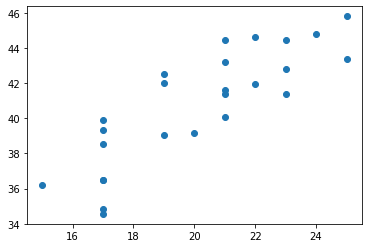

In [145]:
# Mouse weight versus average tumor volume for the Capomulin regimen
# Calculate mean of Weight (g) and Tumor Volume (mm3) based on Mouse ID
Capomulin_gp = Capomulin_df.groupby('Mouse ID')
mice_weight_avg = Capomulin_gp['Weight (g)'].mean()
mice_tumor_avg = Capomulin_gp['Tumor Volume (mm3)'].mean()

# Generate a scatter plot
plt.scatter(mice_weight_avg, mice_tumor_avg)

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
